In [575]:
import pandas as pd

In [576]:
from matplotlib import pyplot

### Sampling rate

In [577]:
sampling_rate = '10L'

In [578]:
##TODO: accept an input directory and process all the files 

In [579]:
raw_acc_file = 'raw_acc.txt'

In [580]:
raw_obd_file = 'raw_obd.txt'

### Reference file

In [581]:
ref_DF =  pd.read_csv(raw_obd_file)

In [582]:
ref_variable = 'timestamp' # variable of obd file

### Processing

In [583]:
acc_DF = pd.read_csv(raw_acc_file)

In [584]:
obd_DF = pd.read_csv(raw_obd_file)

In [585]:
acc_DF.head(5)

,timestamp,sys_time,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
0,0.0,1508975971982,2605508272423122,9.662998,0.517148,-0.612916
1,5.0,1508975971988,2605508277444997,9.691729,0.402226,-0.641646
2,9.0,1508975971993,2605508282402810,9.624691,0.191536,-0.536301
3,15.0,1508975971998,2605508287426247,9.634268,-0.019154,-0.296881
4,19.0,1508975972002,2605508292415310,9.749189,-0.114922,0.076614


In [586]:
obd_DF.head(5)

,timestamp,RPM,Speed,Consumption_Rate,AirFuelRatio,ThrottlePosition,MassAirFlow,FuelType,FuelLevel,FuelTrim,...,AirIntakeTemperature,AmbientAirTemperature,EngineCoolantTemperature,FuelPressure,DistanceMIL,DistanceSinceCCC,EquivalentRatio,IgnitionMonitor,ModuleVoltage,PendingTroubleCodes
0,1508975975440,1667RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1508975976257,1652RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1508975976834,1646RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1508975977029,1663RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1508975977207,1660RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [587]:
start_time = int(ref_DF[ref_variable].head(1))

In [588]:
start_time

1508975975440

In [589]:
end_time = int(ref_DF[ref_variable].tail(1))

In [590]:
end_time

1508976453224

### Sync start and end time

In [591]:
#TODO: repeat for all other files

In [592]:
acc_DF = acc_DF.loc[(acc_DF['sys_time'] >= start_time) & (acc_DF['sys_time'] <= end_time)]

In [593]:
acc_DF.head(5)

,timestamp,sys_time,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
692,3460.0,1508975975445,2605511732459060,9.720459,0.210690,0.287304
693,3465.0,1508975975448,2605511737440310,9.710882,0.296881,0.392649
694,3470.0,1508975975453,2605511742429372,9.662998,0.373495,0.220267
695,3474.0,1508975975458,2605511747419997,9.548077,0.363919,0.306458
696,3479.0,1508975975462,2605511752409060,9.356541,0.335188,0.325611


### Change the default time stamp to 0

In [594]:
acc_DF['sys_time'] = acc_DF['sys_time'] - start_time

In [595]:
obd_DF['timestamp'] = obd_DF['timestamp'] - start_time

In [596]:
acc_DF.head(5)

,timestamp,sys_time,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
692,3460.0,5,2605511732459060,9.720459,0.210690,0.287304
693,3465.0,8,2605511737440310,9.710882,0.296881,0.392649
694,3470.0,13,2605511742429372,9.662998,0.373495,0.220267
695,3474.0,18,2605511747419997,9.548077,0.363919,0.306458
696,3479.0,22,2605511752409060,9.356541,0.335188,0.325611


In [597]:
obd_DF.head(5)

,timestamp,RPM,Speed,Consumption_Rate,AirFuelRatio,ThrottlePosition,MassAirFlow,FuelType,FuelLevel,FuelTrim,...,AirIntakeTemperature,AmbientAirTemperature,EngineCoolantTemperature,FuelPressure,DistanceMIL,DistanceSinceCCC,EquivalentRatio,IgnitionMonitor,ModuleVoltage,PendingTroubleCodes
0,0,1667RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,817,1652RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1394,1646RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1589,1663RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1767,1660RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Convert timestamp to Epoch for sampling

In [598]:
acc_DF['sys_time'] = pd.to_datetime(acc_DF['sys_time'], unit='ms')

In [599]:
obd_DF['timestamp'] = pd.to_datetime(obd_DF['timestamp'], unit='ms')

In [600]:
acc_DF.head(5)

,timestamp,sys_time,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
692,3460.0,1970-01-01 00:00:00.005,2605511732459060,9.720459,0.210690,0.287304
693,3465.0,1970-01-01 00:00:00.008,2605511737440310,9.710882,0.296881,0.392649
694,3470.0,1970-01-01 00:00:00.013,2605511742429372,9.662998,0.373495,0.220267
695,3474.0,1970-01-01 00:00:00.018,2605511747419997,9.548077,0.363919,0.306458
696,3479.0,1970-01-01 00:00:00.022,2605511752409060,9.356541,0.335188,0.325611


In [601]:
obd_DF.head(5)

,timestamp,RPM,Speed,Consumption_Rate,AirFuelRatio,ThrottlePosition,MassAirFlow,FuelType,FuelLevel,FuelTrim,...,AirIntakeTemperature,AmbientAirTemperature,EngineCoolantTemperature,FuelPressure,DistanceMIL,DistanceSinceCCC,EquivalentRatio,IgnitionMonitor,ModuleVoltage,PendingTroubleCodes
0,1970-01-01 00:00:00.000,1667RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-01 00:00:00.817,1652RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-01-01 00:00:01.394,1646RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-01-01 00:00:01.589,1663RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-01-01 00:00:01.767,1660RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Perform resampling 

In [602]:
###TODO: Verify resampling

In [603]:
len(acc_DF.index)

95557

In [604]:
acc_DF = acc_DF.resample(sampling_rate, on='sys_time').mean()

In [605]:
acc_DF.to_csv("new.txt")

In [606]:
acc_DF1 = pd.read_csv("new.txt")

In [607]:
acc_DF1.head(5)

,sys_time,timestamp,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
0,1970-01-01 00:00:00.000,3462.5,2.605512e+15,9.715671,0.253785,0.339977
1,1970-01-01 00:00:00.010,3472.0,2.605512e+15,9.605538,0.368707,0.263362
2,1970-01-01 00:00:00.020,3482.0,2.605512e+15,9.399636,0.296881,0.378284
3,1970-01-01 00:00:00.030,3492.0,2.605512e+15,9.653422,0.138864,0.363919
4,1970-01-01 00:00:00.040,3502.0,2.605512e+15,9.892841,0.047884,0.387861


In [608]:
len(acc_DF.index)

47779

In [609]:
acc_DF = acc_DF.dropna()

In [610]:
len(acc_DF.index)

47602

In [611]:
acc_DF.head(5)

,timestamp,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
sys_time,,,,,
1970-01-01 00:00:00.000,3462.5,2.605512e+15,9.715671,0.253785,0.339977
1970-01-01 00:00:00.010,3472.0,2.605512e+15,9.605538,0.368707,0.263362
1970-01-01 00:00:00.020,3482.0,2.605512e+15,9.399636,0.296881,0.378284
1970-01-01 00:00:00.030,3492.0,2.605512e+15,9.653422,0.138864,0.363919
1970-01-01 00:00:00.040,3502.0,2.605512e+15,9.892841,0.047884,0.387861


In [612]:
len(obd_DF.index)

4384

In [693]:
obd_DF1 = obd_DF.dropna(thresh=1, axis='columns')

In [694]:
obd_DF1.head(5)

,timestamp,RPM,Speed
0,1970-01-01 00:00:00.000,1667RPM,0km/h
1,1970-01-01 00:00:00.817,1652RPM,0km/h
2,1970-01-01 00:00:01.394,1646RPM,0km/h
3,1970-01-01 00:00:01.589,1663RPM,0km/h
4,1970-01-01 00:00:01.767,1660RPM,0km/h


In [695]:
obd_DF1['RPM'] = obd_DF['RPM'].str.strip("RPM").astype('int64')

/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [696]:
obd_DF1['Speed'] = obd_DF['Speed'].str.strip("km/h").astype('int64')

/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [697]:
obd_DF1.head(5)

,timestamp,RPM,Speed
0,1970-01-01 00:00:00.000,1667,0
1,1970-01-01 00:00:00.817,1652,0
2,1970-01-01 00:00:01.394,1646,0
3,1970-01-01 00:00:01.589,1663,0
4,1970-01-01 00:00:01.767,1660,0


In [698]:
obd_DF1 = obd_DF1.rename(index=str,columns = {"timestamp":"sys_time"})

In [699]:
obd_DF1 = obd_DF1.resample(sampling_rate, on='sys_time').sum()

In [700]:
obd_DF1 = obd_DF1.dropna()

In [701]:
obd_DF1.head(5)

,RPM,Speed
sys_time,,
1970-01-01 00:00:00.000,1667.0,0.0
1970-01-01 00:00:00.810,1652.0,0.0
1970-01-01 00:00:01.390,1646.0,0.0
1970-01-01 00:00:01.580,1663.0,0.0
1970-01-01 00:00:01.760,1660.0,0.0


In [702]:
len(obd_DF1.index)

4384

In [780]:
pyplot.figure(figsize=(20,100))

In [781]:
obd_DF1.plot()

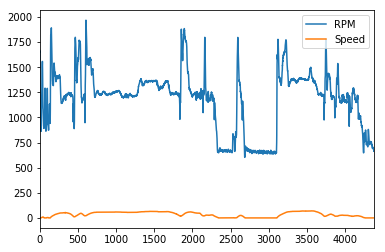

In [782]:
pyplot.show()

In [762]:
acc_DF = acc_DF.astype('float64')

In [763]:
acc_DF.head(5)

,timestamp,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
sys_time,,,,,
1970-01-01 00:00:00.000,3462.5,2.605512e+15,9.715671,0.253785,0.339977
1970-01-01 00:00:00.010,3472.0,2.605512e+15,9.605538,0.368707,0.263362
1970-01-01 00:00:00.020,3482.0,2.605512e+15,9.399636,0.296881,0.378284
1970-01-01 00:00:00.030,3492.0,2.605512e+15,9.653422,0.138864,0.363919
1970-01-01 00:00:00.040,3502.0,2.605512e+15,9.892841,0.047884,0.387861


In [707]:
acc_DF1 = acc_DF.dropna()

In [708]:
acc_DF1.head(5)

,timestamp,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
sys_time,,,,,
1970-01-01 00:00:00.000,3462.5,2.605512e+15,9.715671,0.253785,0.339977
1970-01-01 00:00:00.010,3472.0,2.605512e+15,9.605538,0.368707,0.263362
1970-01-01 00:00:00.020,3482.0,2.605512e+15,9.399636,0.296881,0.378284
1970-01-01 00:00:00.030,3492.0,2.605512e+15,9.653422,0.138864,0.363919
1970-01-01 00:00:00.040,3502.0,2.605512e+15,9.892841,0.047884,0.387861


In [709]:
acc_DF1 = acc_DF.drop(['abs_timestamp', 'timestamp'],axis = 1)

In [710]:
obd_DF1.head(5)

,RPM,Speed
sys_time,,
1970-01-01 00:00:00.000,1667.0,0.0
1970-01-01 00:00:00.810,1652.0,0.0
1970-01-01 00:00:01.390,1646.0,0.0
1970-01-01 00:00:01.580,1663.0,0.0
1970-01-01 00:00:01.760,1660.0,0.0


In [711]:
acc_DF1.to_csv("acc_DF1.txt")

acc_DF1 = pd.read_csv("acc_DF1.txt")
obd_DF1.to_csv("obd_DF1.txt")

obd_DF1 = pd.read_csv("obd_DF1.txt")

In [716]:
acc_DF2 = acc_DF1.merge(obd_DF1,how = 'inner').drop(['RPM', 'raw_y_acc','raw_z_acc'],axis = 1)

In [784]:
acc_DF2.plot()

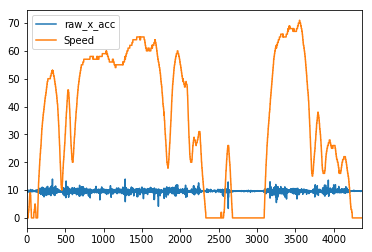

In [785]:
pyplot.show()

Creating new files

In [ ]:
obd_DF1 = obd_DF1.rename(index=str,columns = {"timestamp":"sys_time"}).head(5)

In [643]:
obd_DF1['RPM'] = obd_DF1['RPM'].astype('str') + 'RPM'

In [626]:
obd_DF1['Speed'] = obd_DF1['Speed'].astype('str') + 'km/h'

In [676]:
acc_DF1.to_csv("acc.txt")

acc_DF1 = pd.read_csv("acc.txt")
obd_DF1.to_csv("obd.txt")

obd_DF1 = pd.read_csv("obd.txt")